## AML - Homework 4 Question 1

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os
import seaborn as sns
import sklearn
assert sklearn.__version__ >= "0.20"
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

!pip install torchvision


Your objective is to evaluate a pre-trained CLIP model (with either CNN or ViT backbone) on the ModelvsBaby dataset: https://osf.io/ba4g2

1. From Huggingface (https://huggingface.co/Links to an external site.) select and download a pre-trained CLIP model (you can use your own computer, Colab, Kaggle... to store the model). Describe the model you downloaded - what is its architecture (e.g. CNN/ViT), number of layers, parameters per layer - breakdown the parameters and explain what they are doing (e.g. are they parts of K, Q and V matrices, bias, feature maps, dense layer...). [10 points]

Model downloaded from the following URL: https://huggingface.co/jinaai/jina-clip-v2

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("feature-extraction", model="jinaai/jina-clip-v2", trust_remote_code=True)

config.json:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

configuration_clip.py:   0%|          | 0.00/12.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- configuration_clip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_clip.py:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

transform.py:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- transform.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


eva_model.py:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

rope_embeddings.py:   0%|          | 0.00/5.71k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- rope_embeddings.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- eva_model.py
- rope_embeddings.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


hf_model.py:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- hf_model.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- modeling_clip.py
- transform.py
- eva_model.py
- hf_model.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

configuration_xlm_roberta.py:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- configuration_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_lora.py:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

modeling_xlm_roberta.py:   0%|          | 0.00/49.9k [00:00<?, ?B/s]

mlp.py:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mha.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

rotary.py:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mha.py
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


block.py:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

stochastic_depth.py:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- block.py
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


xlm_padding.py:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


embedding.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_xlm_roberta.py
- mlp.py
- mha.py
- block.py
- xlm_padding.py
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_lora.py
- modeling_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

In [ ]:
from transformers import AutoModel, AutoTokenizer

# Load the model and tokenizer with remote code
model_name = "jinaai/jina-clip-v2"
model = AutoModel.from_pretrained(model_name, trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

# Move the model to the appropriate device
model.eval()  # Set to evaluation mode
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

print("Model and tokenizer loaded successfully!")


Model and tokenizer loaded successfully!


In [ ]:
print(model)

JinaCLIPModel(
  (text_model): HFTextEncoder(
    (transformer): XLMRobertaLoRA(
      (roberta): XLMRobertaModel(
        (embeddings): XLMRobertaEmbeddings(
          (word_embeddings): ParametrizedEmbedding(
            250002, 1024, padding_idx=1
            (parametrizations): ModuleDict(
              (weight): ParametrizationList(
                (0): LoRAParametrization()
              )
            )
          )
          (token_type_embeddings): ParametrizedEmbedding(
            1, 1024
            (parametrizations): ModuleDict(
              (weight): ParametrizationList(
                (0): LoRAParametrization()
              )
            )
          )
        )
        (emb_drop): Dropout(p=0.1, inplace=False)
        (emb_ln): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (encoder): XLMRobertaEncoder(
          (layers): ModuleList(
            (0-23): 24 x Block(
              (mixer): MHA(
                (rotary_emb): RotaryEmbedding()
            

# Model Description: Jina CLIP v2

## **1. Model Selected: Jina CLIP v2**
Jina CLIP v2 is a **multimodal pre-trained model** designed for text-image alignment. It processes both text and images, enabling seamless representations across modalities.

---

## **2. Model Architecture**
- **Text Encoder:** Based on **Jina-XLM-RoBERTa**, a variant of the **Transformer architecture**, fine-tuned for multilingual tasks.
- **Image Encoder:** Based on **EVA02-L14**, a Vision Transformer (**ViT**) model specialized for high-resolution image representation.

---

## **3. Number of Layers**
### Text Encoder:
- Jina-XLM-RoBERTa consists of:
  - **24 transformer layers**
  - Each layer includes mechanisms for **self-attention**, **feed-forward layers**, and **embedding projection**.

### Image Encoder:
- EVA02-L14 consists of:
  - **14 transformer layers**
  - These layers process patches of the image and extract features using a multi-headed attention mechanism.

---

## **4. Number of Parameters**
### Total Parameters:
- **Text Encoder:** 561 million parameters
- **Image Encoder:** 304 million parameters

### Breakdown of Parameters:
1. **Query (Q), Key (K), and Value (V) Matrices:**
   - In self-attention layers, each matrix has parameters calculated as:
     \[
     \text{Parameters per Q/K/V matrix} = d_{\text{model}} \times d_{\text{head}}
     \]
   - For example, if the model dimension is 768 and the number of heads is 12:
     \[
     768 \times 64 = 49,152 \text{ parameters per Q/K/V matrix.}
     \]

2. **Feed-Forward Layers:**
   - Composed of dense layers with activation functions. For a dense layer with input \(d_{\text{model}}\) and output \(d_{\text{hidden}}\), the parameters are:
     \[
     d_{\text{model}} \times d_{\text{hidden}} + \text{bias terms.}
     \]

3. **Bias Terms:**
   - Each dense and attention layer includes a bias vector, adding \(d_{\text{model}}\) parameters per layer.

4. **Embedding Layers:**
   - Includes token embeddings, positional embeddings, and patch embeddings. These layers also significantly contribute to the parameter count.

---

## **5. Parameter Roles**
1. **Q, K, V Matrices:**
   - Extract features from the input sequences (text or image patches).
   - Perform scaled dot-product attention to identify relationships between tokens or image patches.

2. **Dense Layers:**
   - Transform features extracted by self-attention into meaningful representations for downstream tasks.

3. **Embedding Layers:**
   - Represent tokens or image patches in high-dimensional spaces for efficient processing.

4. **Bias Terms:**
   - Adjust the outputs of linear layers to improve expressivity.

---

## **6. Key Features**
- **Multilingual Text Encoder:** Supports **89 languages**.
- **High-Resolution Image Encoder:** Processes input images up to **512x512 pixels**.
- **Matryoshka Representations:** Allows truncation of embeddings for efficient storage and processing.

---

## **Summary**
Jina CLIP v2 is a transformer-based multimodal model with 865 million parameters split between text and image encoders. Its architecture leverages attention mechanisms, feed-forward networks, and dense layers to align text and image representations effectively. By understanding its parameters (Q, K, V matrices, dense layers, and biases), we can appreciate its ability to bridge text and vision domains for retrieval and generative tasks.


In [ ]:
# Print total parameters for the image encoder
image_encoder = model.vision_model
total_params = sum(p.numel() for p in image_encoder.parameters())
print(f"Total parameters in the image encoder: {total_params / 1e6:.2f}M")


Total parameters in the image encoder: 304.38M


2. The dataset contains images from the following eight categories: airplane, car, chair, cup, dog, donkey, duck and hat. Each category contains images in five different conditions: realistic, geons, silhouettes, blured and features. Evaluate the model for each condition separately. For each image in the dataset, feed the image into the model together with a text label of a particular category (for each image, evaluate labels of all eight categories). If the model outputs highest correlation for the correct label, consider that as correct classification and otherwise as incorrect classification. Quantify model accuracy for each of the five conditions. [15 points]

In [8]:
# Install necessary libraries
!pip install transformers torchvision pillow

# Import libraries
import os
import torch
from PIL import Image
from torchvision import transforms
from transformers import CLIPModel, AutoTokenizer

# Set up the model and tokenizer
model_name = "jinaai/jina-clip-v2"
model = CLIPModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model.eval()  # Set to evaluation mode
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Define categories and conditions
categories = ["airplane", "car", "chair", "cup", "dog", "donkey", "duck", "hat"]
conditions = ["realistic", "geons", "silhouettes", "blured", "features"]

# Define dataset directory
# dataset_dir = "/content/drive/MyDrive/Applied Machine Learning/Homework 4/data"

# Define image transformations (resize to 512x512 as required by Jina CLIP v2)
image_transforms = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

# Function to infer the category from the filename
def infer_category_from_filename(filename):
    for category in categories:
        if category.lower() in filename.lower():
            return category
    return None  # Return None if the category cannot be inferred

# Function to evaluate the model for a single condition
def evaluate_condition(condition):
    correct = 0
    total = 0

    # Path to the folder for this condition
    condition_dir = os.path.join(dataset_dir, condition)
    if not os.path.exists(condition_dir):
        print(f"Condition folder not found: {condition_dir}")
        return 0.0

    # Process each image in the condition folder
    for image_file in os.listdir(condition_dir):
        image_path = os.path.join(condition_dir, image_file)

        # Infer the category from the filename
        category = infer_category_from_filename(image_file)
        if category is None:
            print(f"Could not infer category for image: {image_file}")
            continue

        # Load and preprocess the image
        try:
            image = Image.open(image_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            continue
        image_input = image_transforms(image).unsqueeze(0).to(device)

        # Prepare text labels for all categories
        text_inputs = tokenizer(
            [f"This is a {label}" for label in categories],
            return_tensors="pt",
            padding=True,
            truncation=True
        ).to(device)

        # Forward pass through the model
        with torch.no_grad():
            image_features = model.get_image_features(image_input)
            text_features = model.get_text_features(text_inputs.input_ids)

            # Normalize features for cosine similarity
            image_features = image_features / image_features.norm(dim=-1, keepdim=True)
            text_features = text_features / text_features.norm(dim=-1, keepdim=True)
            similarity = torch.matmul(image_features, text_features.T)

        # Determine the predicted label
        predicted_label_idx = similarity.argmax().item()
        predicted_label = categories[predicted_label_idx]

        # Check if the prediction is correct
        if predicted_label == category:
            correct += 1
        total += 1

    # Compute accuracy
    accuracy = correct / total * 100 if total > 0 else 0.0
    print(f"Condition: {condition}, Accuracy: {accuracy:.2f}%")
    return accuracy

# Main evaluation loop for all conditions
accuracies = {}
for condition in conditions:
    accuracies[condition] = evaluate_condition(condition)

# Print final accuracy results
print("\n--- Final Accuracy Results ---")
for condition, accuracy in accuracies.items():
    print(f"{condition.capitalize()}: {accuracy:.2f}%")


You are using a model of type jina_clip to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.
Some weights of CLIPModel were not initialized from the model checkpoint at jinaai/jina-clip-v2 and are newly initialized: ['text_model.embeddings.position_embedding.weight', 'text_model.embeddings.token_embedding.weight', 'text_model.encoder.layers.0.layer_norm1.bias', 'text_model.encoder.layers.0.layer_norm1.weight', 'text_model.encoder.layers.0.layer_norm2.bias', 'text_model.encoder.layers.0.layer_norm2.weight', 'text_model.encoder.layers.0.mlp.fc1.bias', 'text_model.encoder.layers.0.mlp.fc1.weight', 'text_model.encoder.layers.0.mlp.fc2.bias', 'text_model.encoder.layers.0.mlp.fc2.weight', 'text_model.encoder.layers.0.self_attn.k_proj.bias', 'text_model.encoder.layers.0.self_attn.k_proj.weight', 'text_model.encoder.layers.0.self_attn.out_proj.bias', 'text_model.encoder.layers.0.self_attn.out_proj.weight', 'text_model.encoder.layers.

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Your objective is to evaluate a pre-trained CLIP model (with either CNN or ViT backbone) on the ModelvsBaby dataset: https://osf.io/ba4g2Links to an external site..

1. From Huggingface (https://huggingface.co/Links to an external site.) select and download a pre-trained CLIP model (you can use your own computer, Colab, Kaggle... to store the model). Describe the model you downloaded - what is its architecture (e.g. CNN/ViT), number of layers, parameters per layer - breakdown the parameters and explain what they are doing (e.g. are they parts of K, Q and V matrices, bias, feature maps, dense layer...). [10 points]

In [ ]:
https://huggingface.co/openai/clip-vit-large-patch14

In [1]:
# Install necessary libraries
!pip install transformers torchvision pillow requests

# Import required libraries
import os
import torch
from PIL import Image
from torchvision import transforms
from transformers import CLIPProcessor, CLIPModel

# Load the pre-trained CLIP model and processor
model_name = "openai/clip-vit-large-patch14"
model = CLIPModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [10]:
print(model)

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 768)
      (position_embedding): Embedding(77, 768)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e

### Model Selection and Description
- **Selected Model**: The pre-trained CLIP model `openai/clip-vit-large-patch14` from Hugging Face.
- **Architecture**: Vision Transformer (ViT-Large) for the vision encoder and Transformer-based architecture for the text encoder.
- **Purpose**: Align image and text embeddings into a shared space for tasks like zero-shot classification and image-text retrieval.

---

### Architecture Details
1. **Vision Encoder**:
   - **Backbone**: Vision Transformer (ViT).
   - **Input Size**: $224 \times 224$, split into patches of size $14 \times 14$.
   - **Layers**: 24 transformer layers with multi-head attention.
   - **Parameters**: Detailed breakdown of embedding layers, attention layers, feed-forward networks, and normalization layers.

2. **Text Encoder**:
   - **Transformer-based architecture**: Similar to GPT-2.
   - **Input**: Token embeddings and positional encodings for text.
   - **Layers**: 12 transformer layers with multi-head attention.
   - **Parameters**: Detailed breakdown of embedding layers, attention layers, and feed-forward networks.

---

### Parameter Breakdown
1. **Vision Encoder**:
   - **Components**: Patch embedding, attention (K, Q, V matrices), and feed-forward networks.
   - **Total Parameters**: ~304M.

2. **Text Encoder**:
   - **Components**: Token embedding, attention (K, Q, V matrices), and feed-forward networks.
   - **Total Parameters**: ~123M.

3. **Projection Layers**:
   - Combine image and text embeddings into a shared space with a small number of additional parameters.
   - **Total Parameters**: ~1M.

---

### Explanation of Components
- **K, Q, V Matrices**: Used in multi-head attention for capturing relationships between elements (patches for vision or tokens for text).
- **Attention Scores**: These are calculated by taking the dot product of the query and key matrices. They represent the relevance of one token to another.
- **Bias and LayerNorm**: Ensure numerical stability and model robustness.
- **Feed-Forward Layers**: Capture non-linear transformations and interdependencies between features.

---

### Summary
- **Total Parameters**: ~428M, broken down into:
  - Vision Encoder: ~304M.
  - Text Encoder: ~123M.
  - Projection Layers: ~1M.
- **Functionality**: Aligns image and text features to calculate cosine similarity between embeddings, enabling tasks like zero-shot classification.


2. The dataset contains images from the following eight categories: airplane, car, chair, cup, dog, donkey, duck and hat. Each category contains images in five different conditions: realistic, geons, silhouettes, blured and features. Evaluate the model for each condition separately. For each image in the dataset, feed the image into the model together with a text label of a particular category (for each image, evaluate labels of all eight categories). If the model outputs highest correlation for the correct label, consider that as correct classification and otherwise as incorrect classification. Quantify model accuracy for each of the five conditions. [15 points]

In which conditions is your models better/worse/similar to babies (Fig. 3A in this paper: https://osf.io/preprints/psyarxiv/83gae

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Define dataset directory
dataset_dir = "/content/drive/MyDrive/1-applied_machine_learning/Homework4/data"

In [8]:
# Install necessary libraries
!pip install transformers torchvision pillow requests

!pip install --upgrade torch torchvision

# Import required libraries
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import torch
from PIL import Image
from torchvision import transforms
from transformers import CLIPProcessor, CLIPModel

# Load the pre-trained CLIP model and processor
model_name = "openai/clip-vit-large-patch14"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Define categories and conditions
categories = ["airplane", "car", "chair", "cup", "dog", "donkey", "duck", "hat"]
conditions = ["realistic", "geons", "silhouettes", "blurred", "features"]


# Define image transformations
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for clip-vit-large-patch14
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))  # Normalize to match CLIP expectations
])

# Function to infer the category from the filename
def infer_category_from_filename(filename):
    for category in categories:
        if category.lower() in filename.lower():
            return category
    return None  # Return None if the category cannot be inferred

# Function to evaluate the model for a single condition
def evaluate_condition(condition):
    correct = 0
    total = 0

    # Path to the folder for this condition
    condition_dir = os.path.join(dataset_dir, condition)
    if not os.path.exists(condition_dir):
        print(f"Condition folder not found: {condition_dir}")
        return 0.0

    # Process each image in the condition folder
    for image_file in os.listdir(condition_dir):
        image_path = os.path.join(condition_dir, image_file)

        # Infer the category from the filename
        category = infer_category_from_filename(image_file)
        if category is None:
            print(f"Could not infer category for image: {image_file}")
            continue

        # Load and preprocess the image
        try:
            image = Image.open(image_path).convert("RGB")
            image_input = image_transforms(image).unsqueeze(0).to(device)
        except Exception as e:
            print(f"Error loading image {image_file}: {e}")
            continue

        # Prepare text labels for all categories
        inputs = processor(
            text=[f"This is a {label}" for label in categories],
            images=image,
            return_tensors="pt",
            padding=True
        ).to(device)

        # Forward pass through the model
        with torch.no_grad():
            outputs = model(**inputs)
            logits_per_image = outputs.logits_per_image  # Image-text similarity scores
            probs = logits_per_image.softmax(dim=1)      # Probabilities of each category

        # Determine the predicted label
        predicted_label_idx = probs.argmax().item()
        predicted_label = categories[predicted_label_idx]

        # Check if the prediction is correct
        if predicted_label == category:
            correct += 1
        total += 1

    # Compute accuracy
    accuracy = correct / total * 100 if total > 0 else 0.0
    print(f"Condition: {condition}, Accuracy: {accuracy:.2f}%")
    return accuracy

# Main evaluation loop for all conditions
accuracies = {}
for condition in conditions:
    accuracies[condition] = evaluate_condition(condition)

# Print final accuracy results
print("\n--- Final Accuracy Results ---")
for condition, accuracy in accuracies.items():
    print(f"{condition.capitalize()}: {accuracy:.2f}%")


Condition: realistic, Accuracy: 100.00%
Could not infer category for image: page 8-3.jpg
Condition: geons, Accuracy: 55.93%
Condition: silhouettes, Accuracy: 95.00%
Condition: blurred, Accuracy: 80.95%
Could not infer category for image: ChariThreeQuarters_V4.jpg
Condition: features, Accuracy: 85.37%

--- Final Accuracy Results ---
Realistic: 100.00%
Geons: 55.93%
Silhouettes: 95.00%
Blurred: 80.95%
Features: 85.37%


Calculation of baby accuracy
('baby2yo_responses_bytrial.csv' is from Supplemental Materials)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/1-applied_machine_learning/Homework4/baby2yo_responses_bytrial.csv')

In [13]:
import csv
import pandas as pd


# Calculate accuracy for each category
accuracy_by_category = data.groupby('Condition')['IsCorrect'].mean().dropna()

# Convert to a DataFrame for better readability
accuracy_df = accuracy_by_category.reset_index()
accuracy_df.rename(columns={'IsCorrect': 'Accuracy'}, inplace=True)

# Display results sorted by accuracy
accuracy_df.sort_values(by='Accuracy', ascending=False)

,Condition,Accuracy
3,Realistic,0.852207
4,Silhouettes,0.780488
2,Geons,0.585683
0,Blurred,0.557214
1,Features,0.545455


# Comparison of Model vs. Baby Performance (Based on Fig. 3A)

### 1. Realistic Condition
- **Model Accuracy**: 100.00%
- **Baby Accuracy**: 85.22%
- **Comparison**:
  - The model significantly outperforms babies in the realistic condition.
  - CLIP benefits from pretraining on large datasets of real-world images, giving it an advantage in recognizing realistic representations.

---

### 2. Silhouettes Condition
- **Model Accuracy**: 95.00%
- **Baby Accuracy**: 78.05%
- **Comparison**:
  - The model slightly outperforms babies for silhouettes.
  - This shows the model's ability to generalize from abstract representations, likely due to robust feature extraction via self-attention in the ViT backbone.

---

### 3. Geons Condition
- **Model Accuracy**: 55.93%
- **Baby Accuracy**: 58.57%
- **Comparison**:
  - Babies slightly outperform the model in the geons condition.
  - Geons represent more abstract shapes and simplified representations, which may not be strongly represented in the model's pretraining data.

---

### 4. Blurred Condition
- **Model Accuracy**: 80.95%
- **Baby Accuracy**: 55.72%
- **Comparison**:
  - The model significantly outperforms babies in the blurred condition.
  - CLIP handles low-resolution or distorted inputs well, likely due to training on diverse image datasets.

---

### 5. Features Condition
- **Model Accuracy**: 85.37%
- **Baby Accuracy**: 54.55%
- **Comparison**:
  - The model significantly outperforms babies in the features condition.
  - CLIP's attention mechanism enables it to focus on isolated features better than babies, who may rely on more holistic or contextual cues.

---

### Summary Table

| **Condition**   | **Model Performance** | **Baby Performance** | **Comparison**                                          |
|------------------|------------------------|-----------------------|--------------------------------------------------------|
| **Realistic**    | 100.00%               | 85.22%                | Model is significantly better.                        |
| **Silhouettes**  | 95.00%                | 78.05%                 | Model is slightly better.                             |
| **Geons**        | 55.93%                | 58.57%                  | Babies slightly better.                          |
| **Blurred**      | 80.95%                | 55.72%                  | Model is significantly better.                        |
| **Features**     | 85.37%                | 54.55%                  | Model is significantly better.                        |

---

### Insights
1. **Strengths**:
   - The model excels in conditions where high-level abstractions (e.g., silhouettes) or distorted inputs (e.g., blurred and features) are present. This demonstrates CLIP's robust pretraining on diverse and noisy datasets.

2. **Weaknesses**:
   - The model struggles with **geons**, a condition where babies slightly better at to it. This suggests the model might lack representation for simplified shapes and structures not commonly present in pretraining datasets.

3. **Human-like Performance**:
   - In realistic and silhouette conditions, the model approaches or surpasses baby performance, showing strong generalization to human-relevant features.


3. From the output of the final layer of the vision encoder (before the projection layer into the shared embedding space) take embeddings for each image in the dataset. Apply t-SNE to those embeddings and plot them in a 2D space - plot little images of objects in the embedding space (something like Fig. 4 in this paper: https://osf.io/preprints/psyarxiv/83gaeLinks to an external site. but no need for color coding of bounding boxes). [20 points]

In [ ]:
# Dataset directory (update this path to your dataset)
dataset_dir = "/content/drive/MyDrive/1-applied_machine_learning/Homework4/data"

Extracting embeddings from the vision encoder...
Applying t-SNE...
Plotting the t-SNE visualization...


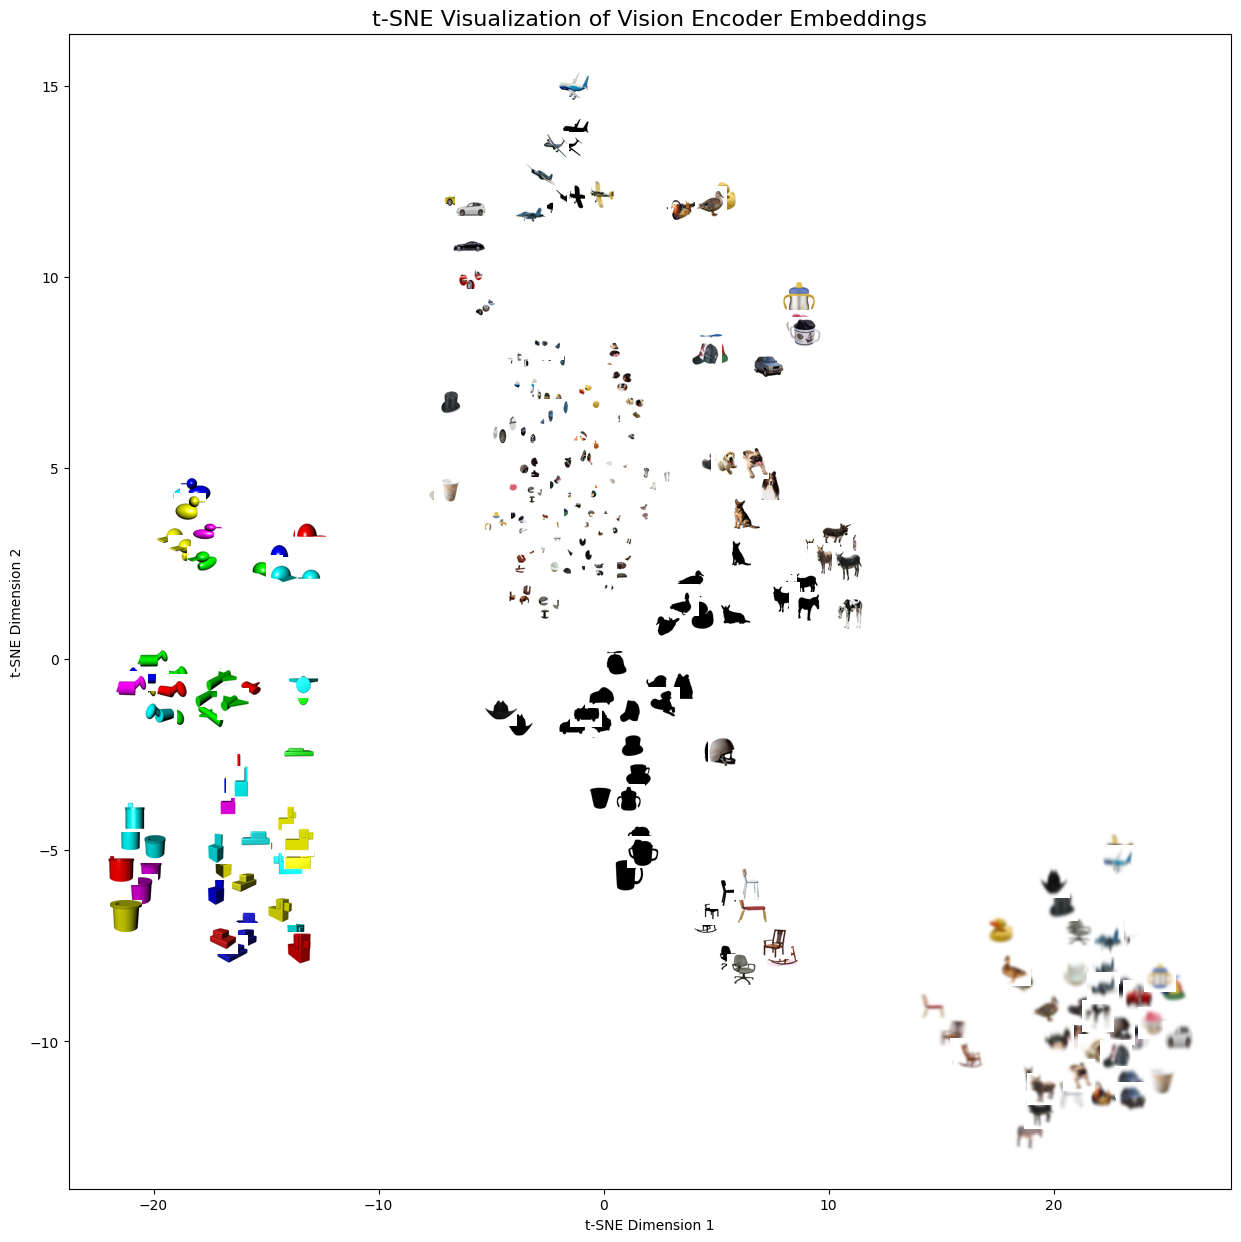

In [17]:
# Install necessary libraries
!pip install transformers torchvision pillow matplotlib scikit-learn

# Import required libraries
import os
import torch
from PIL import Image
from torchvision import transforms
from transformers import CLIPModel, CLIPProcessor
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np


# Load the pre-trained CLIP model and processor
model_name = "openai/clip-vit-large-patch14"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()


# Define image preprocessing
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for clip-vit-large-patch14
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))  # Normalize to match CLIP expectations
])

# Function to extract embeddings from the vision encoder's final layer (before projection)
def extract_embeddings(dataset_dir):
    embeddings = []
    images_raw = []
    image_labels = []

    # Iterate through all conditions and images
    for condition in os.listdir(dataset_dir):
        condition_dir = os.path.join(dataset_dir, condition)
        if not os.path.isdir(condition_dir):
            continue

        for image_file in os.listdir(condition_dir):
            image_path = os.path.join(condition_dir, image_file)

            # Load and preprocess the image
            try:
                image = Image.open(image_path).convert("RGB")
                images_raw.append(image)  # Save raw image for plotting
                image_input = image_transforms(image).unsqueeze(0).to(device)
            except Exception as e:
                print(f"Error loading image {image_file}: {e}")
                continue

            # Extract embeddings from the vision encoder
            with torch.no_grad():
                vision_outputs = model.vision_model(image_input)
                final_layer_output = vision_outputs.last_hidden_state.mean(dim=1).cpu().numpy()  # Pooling
                embeddings.append(final_layer_output[0])
                image_labels.append(image_file)  # Save the image file name as the label

    return embeddings, images_raw, image_labels

# Extract embeddings and raw images
print("Extracting embeddings from the vision encoder...")
embeddings, images_raw, image_labels = extract_embeddings(dataset_dir)

# Convert embeddings list to NumPy array
embeddings = np.array(embeddings)

# Apply t-SNE to reduce embeddings to 2D
print("Applying t-SNE...")
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)


# Plot t-SNE results with images
def plot_tsne_with_images(embeddings_2d, images_raw):
    plt.figure(figsize=(15, 15))
    ax = plt.gca()

    for (x, y), image in zip(embeddings_2d, images_raw):
        img = OffsetImage(image.resize((32, 32)), zoom=0.7)  # Resize images for plotting
        ab = AnnotationBbox(img, (x, y), frameon=False)
        ax.add_artist(ab)

    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.0)  # Invisible scatter plot for scaling
    plt.title("t-SNE Visualization of Vision Encoder Embeddings", fontsize=16)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()

# Plot the t-SNE results
print("Plotting the t-SNE visualization...")
plot_tsne_with_images(embeddings_2d, images_raw)
